Reference Paper: https://link.springer.com/article/10.3758/s13428-018-1099-3

Notebook Author: Salvatore Citraro

# Introduction

The <b>Glasgow Norms</b> are a set of normative ratings for 5553 English words on nine psycholinguistic dimensions: arousal, valence, dominance, concreteness, imageability, familiarity, age of acquisition, semantic size, and gender association.

<b>Arousal</b> is a measure of excitement versus calmness.

<b>Valence</b> is a measure of value or worth.

<b>Dominance</b> is a measure of the degree of control you feel.

Arousal, Valence and Dominance are typically used to characterize a word’s emotional impact.

<b> Concreteness </b>  is a measure of how concrete or abstract something is.

<b>Imageability</b> is a measure of how easy or difficult something is to imagine.

<b>Familiarity</b> is a measure of how familiar something is.

A word’s <b>age of acquisition (aoa)</b> is the age at which that word was initially learned. In this datasets, it referes to an estimation about when an individual thinks he/she first acquired or learned each word.
The scale is defined as a series of consecutive 2-year periods from the ages of 0 to 12 years, and a final period encompassing 13 years and older.

<b>Size</b> is a measure of something’s dimensions, magnitude, or extent.

A word’s <b>gender</b> is how strongly its meaning is associated with male or female behaviour.

Three other variables are presented here, namely the <b>length</b> of each word and a binary attribute defining if a word is polysemous or not. <b> Web Corpus Freq </b> is the frequency of a word in the Google Newspapers Corpus. <b> Polysemy </b> is the ability of a word to convey multiple meanings. The ambiguous words identified in the Glasgow Norms were presented alone - e.g., <i>star</i> - or in disambiguated form - e.g., <i>star (celebrity)</i> or <i>star (sky)</i> - to different participants. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('words_glasgow.csv')

In [3]:
df.head()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0


# Bonus

Each psycholinguistic value from the previous dataset refers to the response given by an individual when a word is introduced without specifying a particular meanining, e.g., <i>star</i> and not <i>star (sky)</i>.

As a bonus dataset, I also provide the values when a polysemous word is presented with an unambiguous meaning. If you want, you can check the following bonus file for your data understanding task, and others.

In [4]:
df_poly = pd.read_csv('words_polysemy_values.csv')

In [5]:
df_poly.head()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender
0,address (postal),7,3.546,5.000,5.114,5.581,4.559,6.094,3.059,3.471,4.000
1,address (speak to),7,4.000,5.559,6.182,4.114,4.200,4.857,4.800,4.171,3.824
2,aim (objective),3,4.909,6.382,5.909,3.294,2.909,6.030,4.529,4.500,4.235
3,aim (target),3,5.200,5.600,6.714,4.677,5.286,5.970,3.618,3.686,4.743
4,Apple (brand),5,4.849,5.971,4.600,5.943,6.677,6.529,6.000,5.353,4.647


In [6]:
df[df['word'] == 'star']

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
3938,star,4,6.6,7.343,5.382,6.229,6.588,6.324,1.971,4.6,2.588,1,122498186.0


In [7]:
df_poly[df_poly['word'] == 'star (celebrity)']

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender
731,star (celebrity),4,5.697,5.576,5.485,4.667,5.667,5.844,3.758,4.849,2.606


In [8]:
df_poly[df_poly['word'] == 'star (sky)']

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender
732,star (sky),4,5.6,7.235,5.086,6.0,6.743,6.333,2.229,4.429,2.914


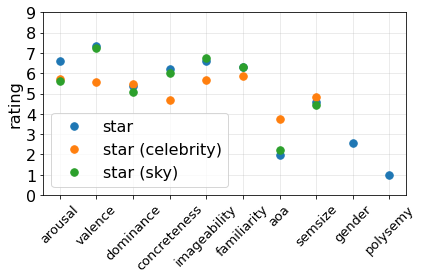

In [9]:
w_aggr = df[df['word'] == 'star'].values
w_cel = df_poly[df_poly['word'] == 'star (celebrity)'].values
w_sky = df_poly[df_poly['word'] == 'star (sky)'].values

plt.plot(w_aggr[:,2:-1][0].tolist(), '.', label='star', ms=15)
plt.plot(w_cel[:,2:-1][0].tolist(), '.', label='star (celebrity)', ms=15)
plt.plot(w_sky[:,2:-1][0].tolist(), '.', label='star (sky)', ms=15)

plt.legend(loc='best', fontsize=16)
plt.ylabel('rating', fontsize=16)
plt.xticks(range(len(df.columns.tolist()[2:-1])), df.columns.tolist()[2:-1], fontsize=13, rotation=45)
plt.yticks(fontsize=16)
plt.grid(alpha=0.3)
plt.ylim(0,9)
plt.tight_layout()

plt.show()